## Get the Panel Data

In [69]:
import pandas as pd

# Read movie review data with sentiment scores
df = pd.read_excel("/Users/hotpotato/Desktop/Final Project/code_output/filtered_reviews_with_sentiment.xlsx")

# Make sure the date format is correct
df['review_date'] = pd.to_datetime(df['review_date'], errors='coerce')
df = df.dropna(subset=['review_date', 'release_date'])

# Convert release_date to datetime
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')

# Calculate the number of weeks after the release of each review (1-6 weeks)
df['week'] = ((df['review_date'] - df['release_date']).dt.days // 7 + 1)
df = df[(df['week'] >= 1) & (df['week'] <= 6)]

# Group by movie and week, count the number of reviews in each group
weekly_counts = df.groupby(['movie', 'week']).size().reset_index(name='review_count')

weekly_counts

,movie,week,review_count
0,12 Hour Shift (2020),1,14
1,12 Hour Shift (2020),2,3
2,12 Hour Shift (2020),3,7
3,12 Hour Shift (2020),4,1
4,12 Hour Shift (2020),5,5
...,...,...,...
176,Wendy (2020),5,2
177,Wendy (2020),6,2
178,Words on Bathroom Walls (2020),4,2
179,Words on Bathroom Walls (2020),5,2


### Use the score from CNN
Although CNN with GloVe did not outperform SVM with TF-IDF in terms of raw accuracy, it remains a valuable choice because it captures deeper semantic relationships between words through pre-trained embeddings. This allows CNN to understand contextual meaning and subtle emotional cues that traditional vectorizers may overlook, making it especially useful when working with more nuanced, informal, or context-dependent language.


In [61]:
# Load the dataset
df = pd.read_excel("/Users/hotpotato/Desktop/Final Project/code_output/filtered_reviews_with_sentiment.xlsx")

# Convert review_date to datetime
df["review_date"] = pd.to_datetime(df["review_date"], errors="coerce")

# Ensure sentiment_score and week are numeric
df["sentiment_score"] = pd.to_numeric(df["sentiment_cnn"], errors="coerce")
df["week"] = pd.to_numeric(df["week_since_release"], errors="coerce")

# Create a binary column for positive sentiment (threshold 0.5)
df["is_positive"] = df["sentiment_score"] >= 0.5

# Filter for weeks 1 to 6 only
df_filtered = df[df["week"].between(1, 6)]

# Group by movie and week, and compute positive ratio
summary = (
    df_filtered.groupby(["movie", "week"])
    .agg(
        total_reviews=("review_detail", "count"),
        positive_reviews=("is_positive", "sum")
    )
    .reset_index()
)
summary["positive_ratio"] = summary["positive_reviews"] / summary["total_reviews"]

# Pivot for clearer week-wise view
summary_pivot = summary.pivot(index="movie", columns="week", values="positive_ratio")

# Optional: rename columns to "Week X Positive %"
summary_pivot.columns = [f"Week {int(c)} Pos %" for c in summary_pivot.columns]


In [63]:
summary_pivot

,Week 1 Pos %,Week 2 Pos %,Week 3 Pos %,Week 4 Pos %,Week 5 Pos %,Week 6 Pos %
movie,,,,,,
12 Hour Shift (2020),0.642857,0.666667,1.000000,0.000000,0.600000,NaN
After We Collided (2020),0.583333,0.423077,0.384615,0.444444,0.250000,0.400000
Archenemy (2020),0.565217,0.200000,0.625000,1.000000,1.000000,NaN
Archive (2020),0.781818,0.666667,0.520000,0.285714,0.500000,0.666667
Bad Boys for Life (2020),NaN,NaN,NaN,NaN,NaN,0.444444
Black Beauty (2020),0.615385,0.600000,0.800000,0.000000,0.600000,0.857143
Bloodshot (2020),0.692308,0.450704,0.466667,NaN,NaN,NaN
Brahms: The Boy II (2020),0.187500,0.368421,0.500000,0.428571,0.333333,0.222222
Centigrade (2020),0.500000,0.500000,0.250000,0.000000,0.000000,0.000000


In [83]:
import pandas as pd

# Load sentiment and review counts per movie-week
reviews_df = pd.read_excel("/Users/hotpotato/Desktop/Final Project/code_output/filtered_reviews_with_sentiment.xlsx")

# Load box office data per movie-week
box_office_df = pd.read_csv("/Users/hotpotato/Desktop/Final Project/code_output/the_numbers_box_office_weeks1-6.csv")

# Preprocess reviews_df: count total and positive reviews per movie-week
reviews_df['week'] = reviews_df['week_since_release'].astype(int)
reviews_df['is_positive'] = reviews_df['sentiment_cnn'] > 0.5

weekly_review_stats = reviews_df.groupby(['movie', 'week']).agg(
    review_count=('sentiment_cnn', 'count'),
    positive_count=('is_positive', 'sum')
).reset_index()

weekly_review_stats['positive_ratio'] = weekly_review_stats['positive_count'] / weekly_review_stats['review_count']

# Merge with box office data
merged_df = pd.merge(
    box_office_df,
    weekly_review_stats,
    how='left',
    left_on=['Movie', 'Week'],
    right_on=['movie', 'week']
)

# Clean up and display final dataset
final_df = merged_df[['Movie', 'Week', 'Gross', 'review_count', 'positive_count', 'positive_ratio']]
final_df = final_df.dropna(subset=['review_count']).reset_index(drop=True)
final_df

,Movie,Week,Gross,review_count,positive_count,positive_ratio
0,The New Mutants (2020),1,"$7,037,017",28.0,15.0,0.535714
1,The New Mutants (2020),2,"$3,037,702",76.0,37.0,0.486842
2,The New Mutants (2020),3,"$2,089,204",36.0,19.0,0.527778
3,The New Mutants (2020),4,"$1,631,833",48.0,23.0,0.479167
4,The New Mutants (2020),5,"$1,172,088",29.0,4.0,0.137931
...,...,...,...,...,...,...
125,Words on Bathroom Walls (2020),4,"$230,951",2.0,2.0,1.000000
126,Words on Bathroom Walls (2020),5,"$147,357",2.0,2.0,1.000000
127,Words on Bathroom Walls (2020),6,"$79,818",2.0,2.0,1.000000
128,The Last Shift (2020),1,"$246,491",7.0,5.0,0.714286


In [89]:
print(final_df.columns.tolist())


['movie', 'week', 'gross', 'review_count', 'positive_count', 'positive_ratio']


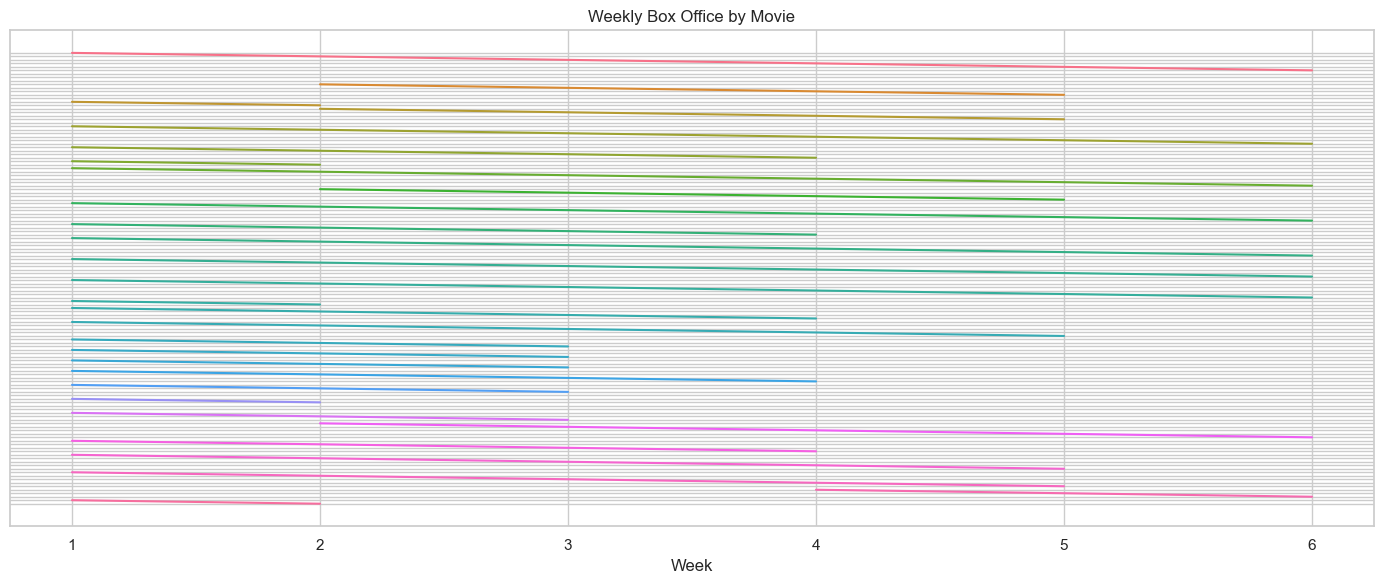

In [103]:
# Make sure week is a string
final_df['week'] = final_df['week'].astype(str)

# Set style
sns.set(style="whitegrid")

# Draw
plt.figure(figsize=(14, 6))
sns.lineplot(data=final_df, x="week", y="gross", hue="movie", legend=False)
plt.title("Weekly Box Office by Movie")

# Hide y-axis label scale
plt.gca().set_yticklabels([]) # Key statements
plt.ylabel("")

plt.xlabel("Week")
plt.tight_layout()
plt.show()

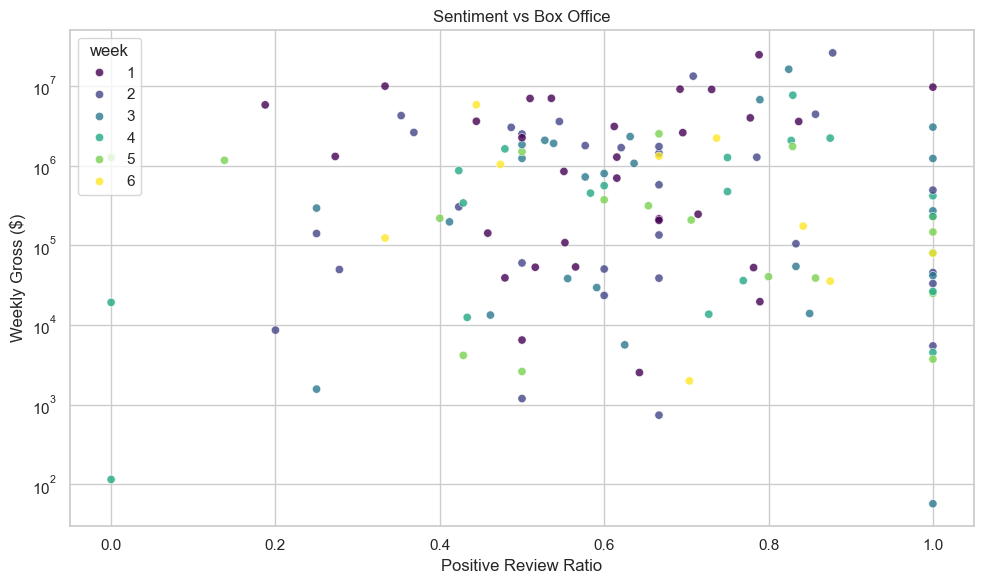

In [117]:


sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=final_df,
    x="positive_ratio",
    y="gross",
    hue="week",
    palette="viridis",
    alpha=0.8
)

plt.yscale("log")  # Optional: log scale makes lower-grossing movies easier to compare
plt.title("Sentiment vs Box Office")
plt.xlabel("Positive Review Ratio")
plt.ylabel("Weekly Gross ($)")
plt.tight_layout()
plt.show()


                            OLS Regression Results                            
Dep. Variable:                  gross   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     2.803
Date:                Thu, 01 May 2025   Prob (F-statistic):             0.0965
Time:                        22:30:19   Log-Likelihood:                -2159.8
No. Observations:                 130   AIC:                             4324.
Df Residuals:                     128   BIC:                             4329.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1.622e+06    4.1e+05      3.959   

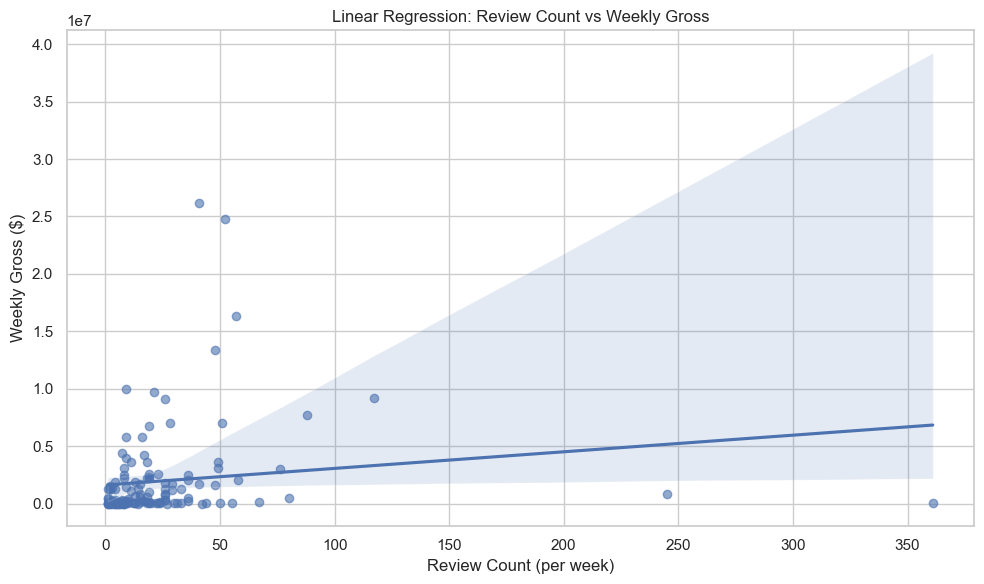

In [145]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Load the clean final_df if not already
final_df['week'] = final_df['week'].astype(int)

# Drop rows with missing values in either review_count or gross
df_reg = final_df[['review_count', 'gross']].dropna()

# Prepare variables
X = df_reg['review_count']
y = df_reg['gross']

# Add constant to X for statsmodels
X_sm = sm.add_constant(X)

# Fit linear regression model
model = sm.OLS(y, X_sm).fit()
print(model.summary())

# Plot regression line with scatterplot
plt.figure(figsize=(10, 6))
sns.regplot(x='review_count', y='gross', data=df_reg, scatter_kws={'alpha':0.6})
plt.title("Linear Regression: Review Count vs Weekly Gross")
plt.xlabel("Review Count (per week)")
plt.ylabel("Weekly Gross ($)")
plt.tight_layout()
plt.grid(True)
plt.show()



In [129]:
import statsmodels.api as sm

X = df_clean[['review_count', 'positive_ratio']]
X = sm.add_constant(X)
y = df_clean['gross']

model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  gross   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     1.982
Date:                Thu, 01 May 2025   Prob (F-statistic):              0.142
Time:                        18:01:34   Log-Likelihood:                -2159.2
No. Observations:                 130   AIC:                             4324.
Df Residuals:                     127   BIC:                             4333.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           5.752e+05   1.05e+06      0.


### Conclusion:
R-squared: 0.030 (very low explanatory power)
F-statistic p-value: 0.142 → Model is not statistically significant
review_count: coef = 15,180, p = 0.082 (marginal but not significant)
positive_ratio: coef = 1.60e+06, p = 0.284 (not significant)
This baseline model does not explain much variation in gross revenue. Neither review volume nor sentiment score is a statistically significant predictor on its own
The regression model is **statistically significant** overall but **explains little** of the variation in box office revenue. Only week is a significant predictor.



In [149]:
# Clean up empty values
df_clean = final_df.dropna(subset=['gross', 'review_count', 'positive_ratio'])

# Convert 'gross' to float by removing currency symbols and commas
df_clean['gross'] = df_clean['gross'].replace('[\$,]', '', regex=True).astype(float)

# Create the design matrix X and target y
X = df_clean[["review_count", "positive_ratio", "week"]]
X = sm.add_constant(X)
y = df_clean["gross"]

# Fit the OLS model
model = sm.OLS(y, X).fit()

# Return the summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  gross   R-squared:                       0.079
Model:                            OLS   Adj. R-squared:                  0.057
Method:                 Least Squares   F-statistic:                     3.601
Date:                Thu, 01 May 2025   Prob (F-statistic):             0.0154
Time:                        22:31:14   Log-Likelihood:                -2155.9
No. Observations:                 130   AIC:                             4320.
Df Residuals:                     126   BIC:                             4331.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           2.192e+06   1.21e+06      1.

<>:5: SyntaxWarning: invalid escape sequence '\$'
<>:5: SyntaxWarning: invalid escape sequence '\$'
/var/folders/x6/dbkrtxl50n57204wss8d8p5r0000gn/T/ipykernel_33593/498665695.py:5: SyntaxWarning: invalid escape sequence '\$'
  df_clean['gross'] = df_clean['gross'].replace('[\$,]', '', regex=True).astype(float)



### Conclusion:
R-squared: 0.079 (better than Model 1)
F-statistic p-value: 0.0154 → Model is statistically significant.
week: coef = -580,600, p = 0.011 → Significant negative effect.
review_count and positive_ratio: still not significant.
Adding the variable week improves the model significantly. It confirms that each additional week after release reduces revenue, likely due to declining audience interest or fewer showings.



In [137]:
import statsmodels.formula.api as smf

# Create week dummies
final_df['week'] = final_df['week'].astype(str)  # make sure week is categorical
model = smf.ols(formula="gross ~ review_count + positive_ratio + C(week)", data=final_df).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  gross   R-squared:                       0.087
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     1.666
Date:                Thu, 01 May 2025   Prob (F-statistic):              0.123
Time:                        18:36:35   Log-Likelihood:                -2155.3
No. Observations:                 130   AIC:                             4327.
Df Residuals:                     122   BIC:                             4350.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       1.963e+06   1.25e+06      1.


### Conclusion
R-squared: 0.087 (highest among all models)
F-statistic p-value: 0.123 → Not statistically significant overall
Significant week dummies:
C(week)[T.4]: coef = -2.56e+06, p = 0.030 
C(week)[T.5]: coef = -2.72e+06, p = 0.033 
Other weeks and predictors: not significant
Model 3 shows week 4 and week 5 are associated with a significant drop in revenue, suggesting that the box office typically falls off sharply after the third week. However, the overall model is not significant, possibly due to the addition of many dummy variables with overlapping effects.